In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

In [5]:
dataset.drop("sl_no",inplace=True,axis=1)

In [6]:
dataset["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [7]:
dataset[dataset["status"] == "Not Placed"]["salary"].isna().sum()

67

In [8]:
dataset[dataset["status"] == "Placed"]["salary"].isna().sum()

0

In [9]:
#Replacing the salary column with median
dataset["salary"].fillna(dataset["salary"].median(),inplace=True)

In [10]:
from Univariate import Univariate

In [11]:
quan,qual=Univariate.quanqual(dataset)

In [12]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df_qual=imp.fit_transform(dataset[qual])

In [14]:
df_qual = pd.DataFrame(df_qual, columns=qual)

In [15]:
dataset[qual]=df_qual

In [16]:
dataset.isnull().sum()

gender            0
ssc_p             2
ssc_b             0
hsc_p             2
hsc_b             0
hsc_s             0
degree_p          2
degree_t          0
workex            0
etest_p           2
specialisation    0
mba_p             2
status            0
salary            0
dtype: int64

In [17]:
#replacing the nan values using simple imputer
mean_column=[columnName for columnName in dataset[quan].columns if columnName!="salary"]

In [18]:
mean_column

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [19]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[mean_column])
df_quan=imp.transform(dataset[mean_column])

In [20]:
df_quan=pd.DataFrame(df_quan,columns=mean_column)

In [21]:
dataset[mean_column]=df_quan

In [22]:
#pereprocessed dataset
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [23]:
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

 Reason for non placement from the dataset

In [24]:
Academic_Performance=pd.DataFrame(index=mean_column,columns=["Average_Placed","Average_not_Placed","Difference"])
for columnName in mean_column:
    Academic_Performance["Average_Placed"][columnName]=dataset[dataset["status"]=="Placed"][columnName].mean()
    Academic_Performance["Average_not_Placed"][columnName]=dataset[dataset["status"]=="Not Placed"][columnName].mean()
    Academic_Performance["Difference"][columnName]=Academic_Performance["Average_Placed"][columnName]-Academic_Performance["Average_not_Placed"][columnName]

In [25]:
Academic_Performance

,Average_Placed,Average_not_Placed,Difference
ssc_p,71.6626,57.544,14.1185
hsc_p,69.8786,58.3955,11.4831
degree_p,68.7089,61.1342,7.57476
etest_p,73.2229,69.5879,3.63496
mba_p,62.5754,61.6128,0.96254


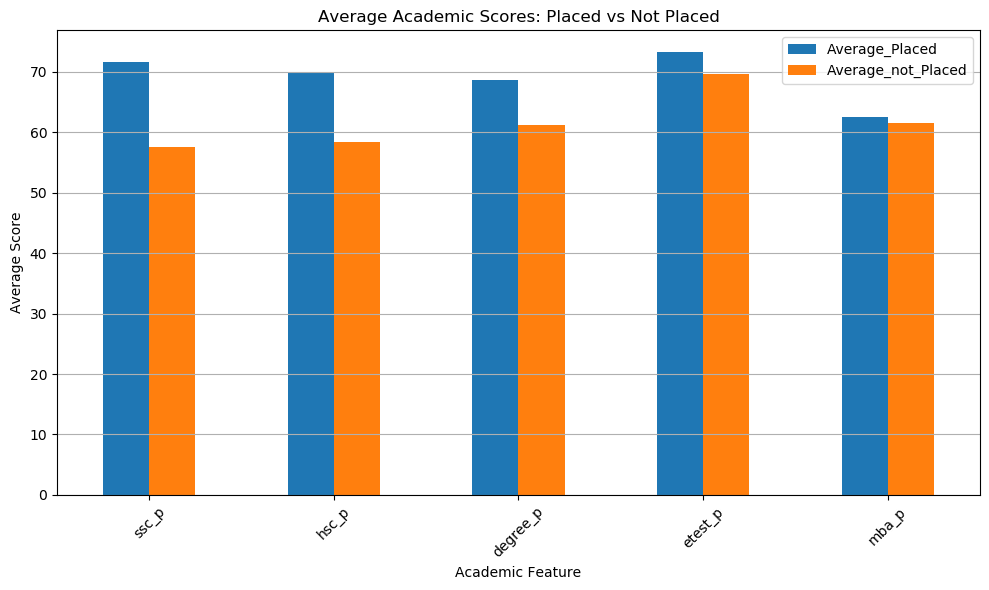

In [26]:
import matplotlib.pyplot as plt
Academic_Performance = Academic_Performance.astype(float)
# Plot bar chart
Academic_Performance[["Average_Placed", "Average_not_Placed"]].plot(kind='bar', figsize=(10,6))
plt.title("Average Academic Scores: Placed vs Not Placed")
plt.ylabel("Average Score")
plt.xlabel("Academic Feature")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [27]:
for columnName in qual:
    value_count=dataset[dataset["status"] == "Not Placed"][columnName].value_counts()
    value_count1=dataset[dataset["status"] == "Placed"][columnName].value_counts()
    print(f"Not Placed\n{value_count}\n")
    print(f"Placed\n{value_count1}")

Not Placed
M    39
F    28
Name: gender, dtype: int64

Placed
M    102
F     48
Name: gender, dtype: int64
Not Placed
Central    38
Others     29
Name: ssc_b, dtype: int64

Placed
Central    80
Others     70
Name: ssc_b, dtype: int64
Not Placed
Others     40
Central    27
Name: hsc_b, dtype: int64

Placed
Others     93
Central    57
Name: hsc_b, dtype: int64
Not Placed
Commerce    34
Science     28
Arts         5
Name: hsc_s, dtype: int64

Placed
Commerce    81
Science     63
Arts         6
Name: hsc_s, dtype: int64
Not Placed
Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: degree_t, dtype: int64

Placed
Comm&Mgmt    104
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64
Not Placed
No     57
Yes    10
Name: workex, dtype: int64

Placed
No     86
Yes    64
Name: workex, dtype: int64
Not Placed
Mkt&HR     42
Mkt&Fin    25
Name: specialisation, dtype: int64

Placed
Mkt&Fin    97
Mkt&HR     53
Name: specialisation, dtype: int64
Not Placed
Not Placed    67
Name: status, dt

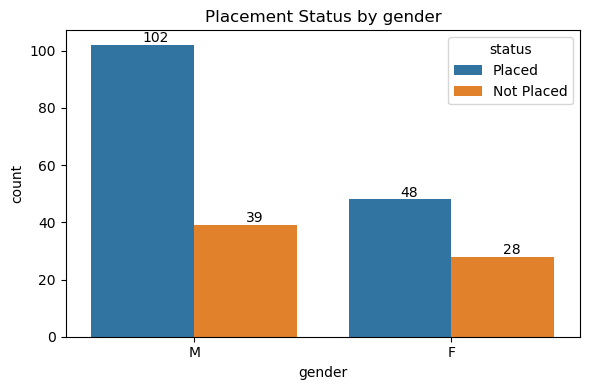

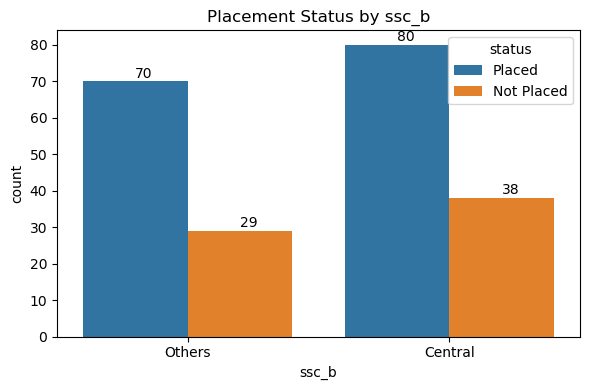

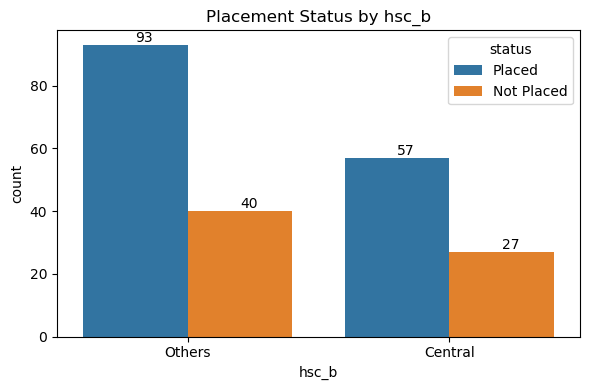

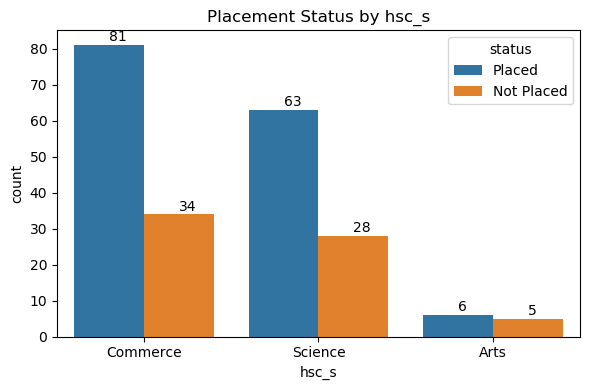

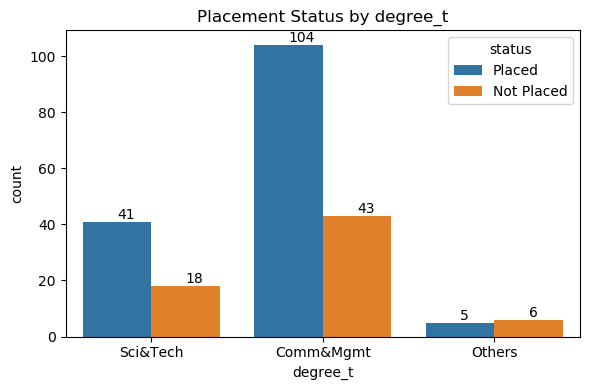

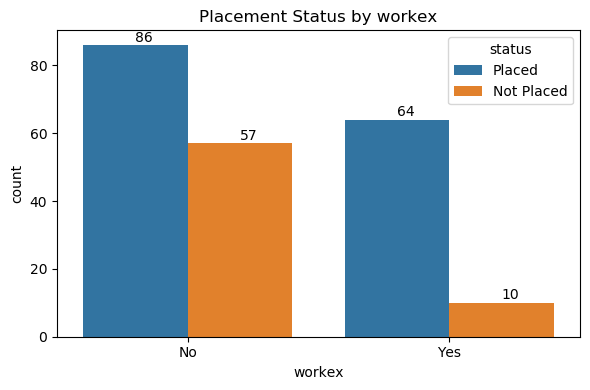

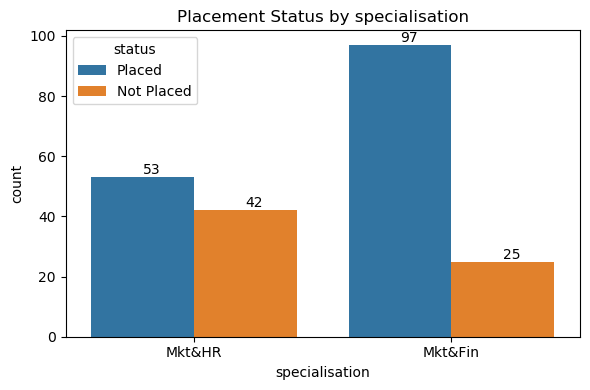

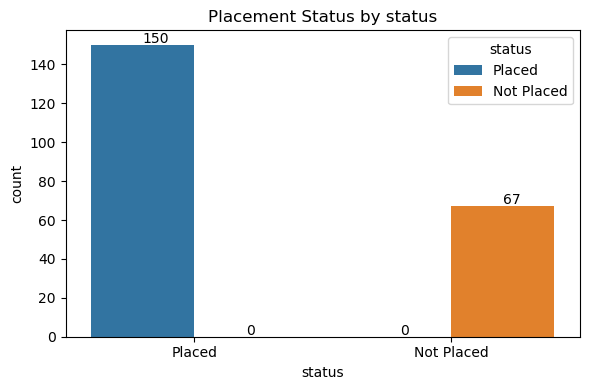

In [28]:
import seaborn as sns
for columnName in qual:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=dataset, x=columnName, hue="status")
    plt.title(f"Placement Status by {columnName}")
    # Add count labels on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x() + p.get_width() / 2,y = height + 1, s = int(height))
    plt.tight_layout()
    plt.show()


In [49]:
#low academic scores in SSC and HSC.
#lack of work experience.
#no salary for not placed.
#gender,specialisation.

In [29]:
dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.108647
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.122897
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.053341
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.169199
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.155642
salary,0.108647,0.122897,0.053341,0.169199,0.155642,1.000000


In [30]:
#The relation between salary and mba_p(0.146324) is a low degree of positive correlation

In [31]:
minimum_salary=dataset["salary"].min()

In [32]:
min_salary_rows=dataset[dataset["salary"]==minimum_salary]

In [33]:
print(min_salary_rows["specialisation"])

1      Mkt&Fin
17     Mkt&Fin
46     Mkt&Fin
52      Mkt&HR
109     Mkt&HR
137     Mkt&HR
Name: specialisation, dtype: object


In [34]:
#Mkt&Fin and Mkt&HR are getting minimum salary 

In [35]:
higher_salary=(dataset["salary"]>500000).sum()

In [36]:
print(f"Number of students getting above 500000 salary: {higher_salary}")

Number of students getting above 500000 salary: 3


In [37]:
import scipy.stats as stats
stats.f_oneway(dataset["etest_p"],dataset["mba_p"])

F_onewayResult(statistic=100.49298790500407, pvalue=2.101472592739362e-21)

In [38]:
#The p-value is less than 0.05.
#Accepts Alternate Hypothesis and Rejects Null Hypothesis.
#There is a significant difference between means of etest_p and mba_p.

In [39]:
from scipy.stats import ttest_ind
degree=dataset[dataset["degree_t"]=="Sci&Tech"]["salary"]
special=dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]
ttest_ind(degree,special)

Ttest_indResult(statistic=3.053005553314895, pvalue=0.0026752836979138848)

In [40]:
#The p-value is less than 0.05.
#Rejects Null Hypothesis and Accepts Alternate Hypothesis.
#There is a significant difference between degree_t(sci&tech) and specialisation(Mkt&HR) with respect to salary.

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


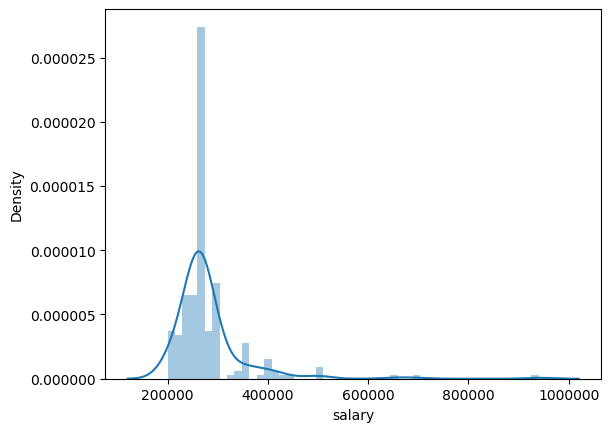

In [41]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [42]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    print("Mean of Z-scores:", sum(z_score)/len(z_score))

Mean of Z-scores: 2.4609091006668217e-16


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


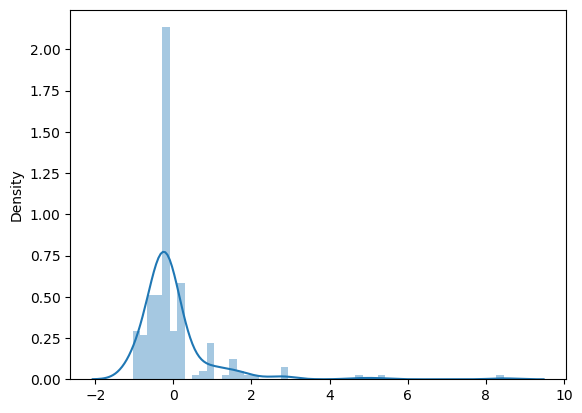

In [43]:
stdNBgraph(dataset["salary"])

In [44]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=281133.641, Standard Deviation=77885.098
The area between range(700000,900000):3.765944234744937e-08


3.765944234744937e-08

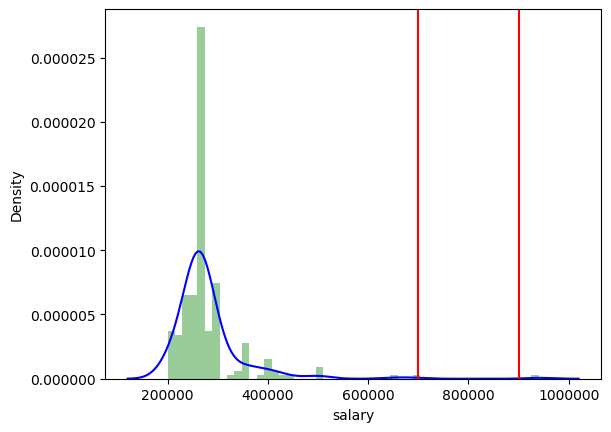

In [45]:
get_pdf_probability(dataset["salary"],700000,900000)

In [46]:
from scipy.stats import ttest_rel
specialisation=dataset[dataset["degree_t"]=="Sci&Tech"]["etest_p"]
specialisation1=dataset[dataset["degree_t"]=="Sci&Tech"]["mba_p"]
ttest_rel(specialisation,specialisation1)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [47]:
#The p-value is less than 0.05.
#Accepts Alternate Hypothesis and Rejects Null Hypothesis.
#There is a significant difference between degree_t(Sci&Tech) with respect to etest_p and mba_p 

In [48]:
dataset.corr()["salary"]#salary is highly correlated to etest_p

ssc_p       0.108647
hsc_p       0.122897
degree_p    0.053341
etest_p     0.169199
mba_p       0.155642
salary      1.000000
Name: salary, dtype: float64